# IMAGE CLASSIFICATION PROJECT

### Table of Contents

<!DOCTYPE html>
<html>
  <head>
    <title>Title of the document</title>
    <style>
      ol {
        counter-reset: item;
      }
      li {
        display: block;
        color: #FFFFFF;
      }
      li:before {
        content: counters(item, ".") " ";
        counter-increment: item;
      }
    </style>
  </head>
  <body>

<ol>
    <li><a href="https://#Objective">Objective</a></li>
    <li>
        <a href="https://#Setup and Load Data">Setup and Load Data</a>
        <ol>
            <li><a href="#Install-Dependencies-and-Setup">Install Dependencies and Setup</a></li>
            <li><a href="#Remove-Dodgy-Images">Remove Dodgy Images</a></li>
            <li><a href="#Load-Data">Load Data</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Preprocess Data">Preprocess Data</a>
        <ol>
            <li><a href="#Scale Data">Scale Data</a></li>
            <li><a href="#Split Data">Split Data</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Build First Deep Model">Build First Deep Model</a>
        <ol>
        <li><a href="#Build First Deep Learning Model">Build First Deep Learning Model</a></li>
        <li><a href="#Train the Model">Train the Model</a></li>
        <li><a href="#Model Evaluation and Testing">Model Evaluation and Testing</a>
        </ol>
    </li>
    <li>   
        <a href="https://#Build Second Deep Model">Build Second Deep Model</a>
        <ol>
        <li><a href="#Build Second Deep Learning Model">Build Second Deep Learning Model</a></li>
        <li><a href="#Train the Model">Train the Model</a></li>
        <li><a href="#Model Evaluation and Testing">Model Evaluation and Testing</a>
        </ol>
    </li>
    <li>
        <a href="https://#Insights and Findings">Insights and Findings</a>
    </li>
    <li>
        <a href="https://#Next Steps">Next Steps</a>
    </li>
</ol>
  </body>

            

### OBJECTIVE  
The objective of the project is to come up with a model that can classify pictures into two classes,  
Happy and Sad.

### 1. Setup and Load Data

#### 1.1 Install Dependencies and Setup

In [1]:
import tensorflow as tf 
import os
import cv2
import imghdr
import matplotlib.pyplot as plt

C:\Users\bradd\AppData\Local\Temp\ipykernel_3180\414240291.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


#### 1.2 Remove Dodgy Images

In [8]:
# Reading the data
data_dir = 'data'

In [9]:
# List of all images in happy folder
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '108584594-portrait-of-happy-friends-having-fun-and-making-group-photo-and-smiling.jpg',
 '154006829.jpg',
 '2016-01-04-1451880335-5503640-thedailyhabitsofsupremelyhappypeople.jpg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '613k1XcpYCL.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '8cEbMbgxi.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc--baby-essentials-baby-baby.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'download (1).jpg',
 'download (10).jpg',
 'download (11).jpg',
 'download (12).jpg',
 'download (13).jpg',
 'download (14).jpg',
 'download (15).jpg',
 'download (16).jpg',
 'download (17).jpg',
 'download (18).jpg',
 'download (19).jpg',
 'download (2).jpg',
 'download (21).jpg',
 'download (22).jpg',
 'download (23).jpg',
 'download (24).jpg',


In [10]:
# Image extensions 
image_exts = ['jpeg', 'jpg','bmp', 'png']

In [11]:
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [12]:
img.shape

(3744, 5616, 3)

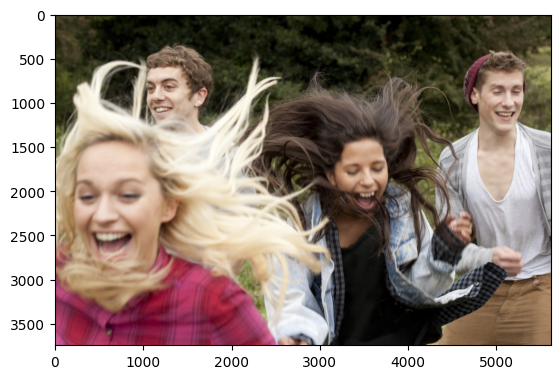

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#### 1.3 Load Data

In [15]:
#tf.data.Dataset??

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
#tf.keras.utils.image_dataset_from_directory??

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1115 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

In [21]:
len(batch)

2

In [22]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
# Resize the images
tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128,128))

Found 1115 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
# Class 1 = Sad pple
# Class 0 = Happy pple
batch[1]

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

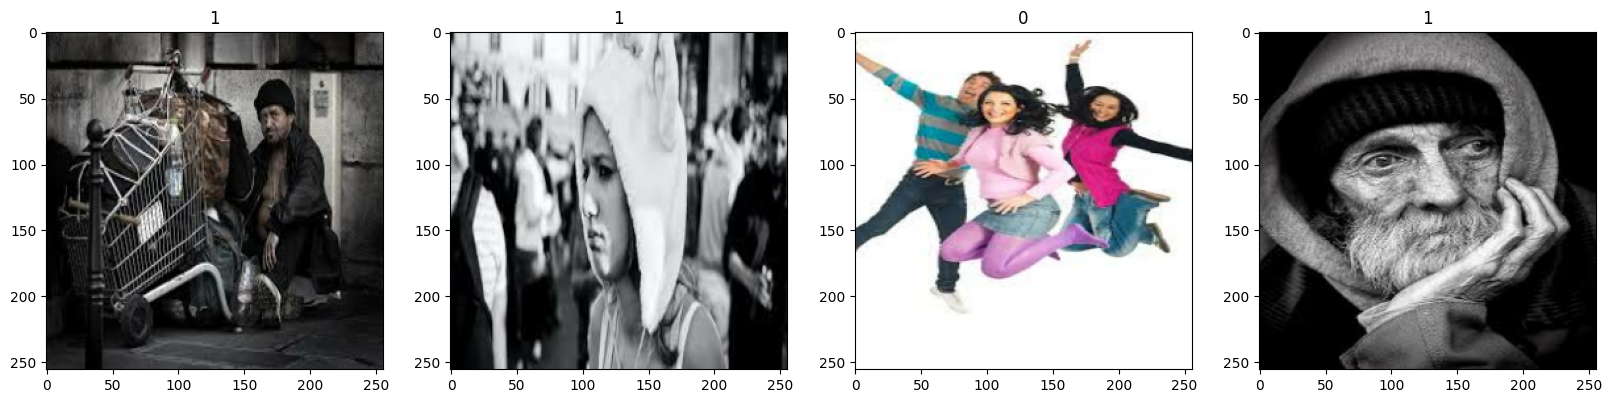

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [26]:
print(batch[0].min())
print(batch[0].max())


0.0
255.0


In [27]:
scaled = batch[0]/255

In [28]:
print(scaled.min())
print(scaled.max())

0.0
1.0


### 2.0 Preprocess Data

#### 2.1 Scale Data

In [29]:
data = data.map(lambda X, y: (X/255, y))

In [30]:
scaled_iterator = data.as_numpy_iterator()

In [31]:
batch = scaled_iterator.next()

In [32]:
batch[1].max()

1

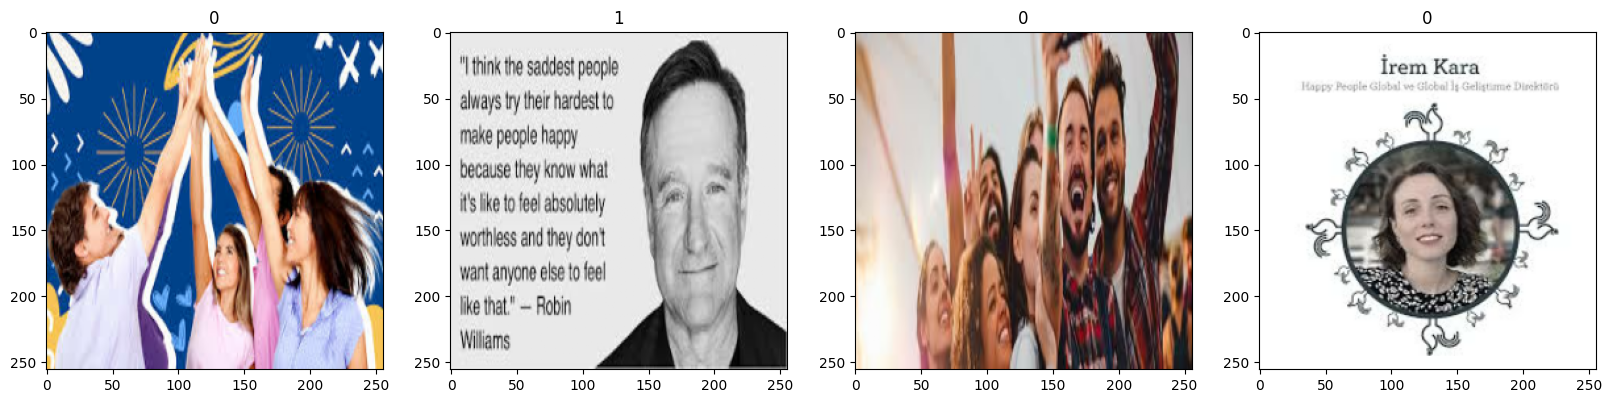

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split Data

In [34]:
len(data)

35

In [35]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [36]:
print('train_size: {}\n val_size: {}\n test_size: {}'.format(train_size, val_size, test_size))

train_size: 24
 val_size: 8
 test_size: 3


In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [38]:
print('train_size: {}\n val_size: {}\n test_size: {}'.format(len(train), len(val), len(test)))

train_size: 24
 val_size: 8
 test_size: 3


### 3.0 Deep Model

#### 3.1 Build Deep Learning Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#### 3.2 Train

In [44]:
logdir = 'logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
#hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

In [47]:
# Pickling the model
import pickle

In [48]:
# Writing a Pickle file with the Model
pickle.dump(hist, open('hist.pkl', 'wb'))

NameError: name 'hist' is not defined

In [ ]:
pickle.dump(model, open('dlimageclassifier.pkl', 'wb'))

In [ ]:
model = pickle.load(open('dlimageclassifier.pkl', 'rb'))

In [ ]:
hist = pickle.load(open('hist.pkl', 'rb'))

In [ ]:
# History 
hist.history

{'loss': [0.6754757761955261,
  0.6275272369384766,
  0.5897154808044434,
  0.5188731551170349,
  0.45807746052742004,
  0.4434450566768646,
  0.40099871158599854,
  0.2988471984863281,
  0.22122736275196075,
  0.14633025228977203,
  0.13429056107997894,
  0.08677522093057632,
  0.0510331392288208,
  0.06275952607393265,
  0.03726568445563316,
  0.019461728632450104,
  0.02322731353342533,
  0.009356855414807796,
  0.010964371263980865,
  0.012489359825849533],
 'accuracy': [0.6315104365348816,
  0.6705729365348816,
  0.7161458134651184,
  0.7604166865348816,
  0.8020833134651184,
  0.8151041865348816,
  0.8346354365348816,
  0.8763020634651184,
  0.91796875,
  0.9440104365348816,
  0.9557291865348816,
  0.9739583134651184,
  0.98828125,
  0.9830729365348816,
  0.98828125,
  0.9947916865348816,
  0.9973958134651184,
  0.9986979365348816,
  0.9973958134651184,
  0.9973958134651184],
 'val_loss': [0.6366732120513916,
  0.5917785167694092,
  0.5821323990821838,
  0.5198627710342407,
  0.5

#### 3.3 Plot Performance 

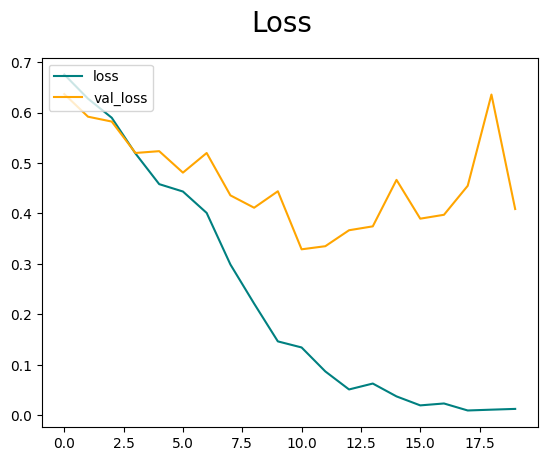

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

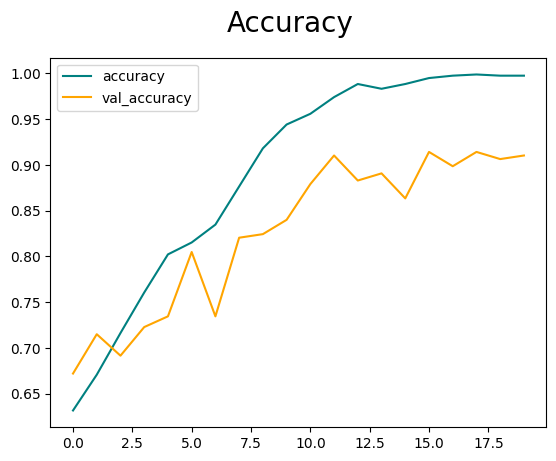

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 4.0 Evaluate Performance

#### 4.1 Evaluate 

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 2s 2s/step


In [61]:
print(f'Precision:{pre.result().numpy()},\n Recall:{re.result().numpy()},\n Accuracy:{acc.result().numpy()}')

Precision:0.5,
 Recall:0.02857142873108387,
 Accuracy:0.6153846383094788


#### 4.2 Test

In [64]:
import cv2

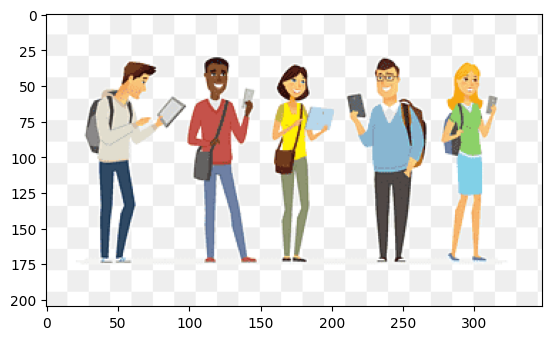

In [115]:
img = cv2.imread(os.path.join('test', 'test2.png'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [110]:
img.shape

(494, 348, 3)

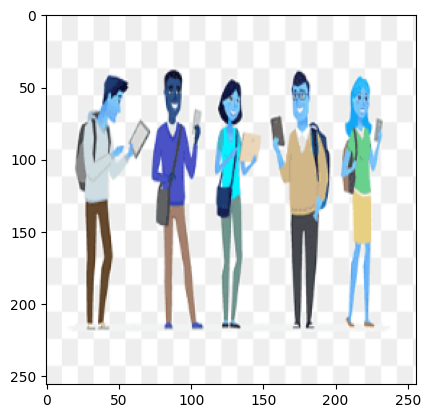

In [116]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[255.     , 255.     , 255.     ],
        [255.     , 255.     , 255.     ],
        [255.     , 255.     , 255.     ],
        ...,
        [253.27344, 253.27344, 253.27344],
        [238.     , 238.     , 238.     ],
        [238.     , 238.     , 238.     ]],

       [[255.     , 255.     , 255.     ],
        [255.     , 255.     , 255.     ],
        [255.     , 255.     , 255.     ],
        ...,
        [253.27344, 253.27344, 253.27344],
        [238.     , 238.     , 238.     ],
        [238.     , 238.     , 238.     ]],

       [[255.     , 255.     , 255.     ],
        [255.     , 255.     , 255.     ],
        [255.     , 255.     , 255.     ],
        ...,
        [253.27344, 253.27344, 253.27344],
        [238.     , 238.     , 238.     ],
        [238.     , 238.     , 238.     ]],

       ...,

       [[238.     , 238.     , 238.     ],
        [238.     , 238.     , 238.     ],
        [238.     , 238.   

In [88]:
resize.shape

TensorShape([256, 256, 3])

In [102]:
# Put it in another list/wrap in another set of arrays
np.expand_dims(resize, 0)

array([[[[2.1956250e+02, 2.2656250e+02, 2.4556250e+02],
         [2.1654517e+02, 2.2354517e+02, 2.4354517e+02],
         [2.1618750e+02, 2.2300000e+02, 2.4281250e+02],
         ...,
         [5.2058594e+01, 2.6621094e+01, 4.2433594e+01],
         [6.3095459e+01, 3.6407959e+01, 5.2407959e+01],
         [7.2390625e+01, 4.5390625e+01, 6.1390625e+01]],

        [[2.2000000e+02, 2.2737891e+02, 2.4562109e+02],
         [2.1668750e+02, 2.2368750e+02, 2.4330859e+02],
         [2.1511646e+02, 2.2192896e+02, 2.4092896e+02],
         ...,
         [4.0675781e+01, 1.4296875e+01, 3.0296875e+01],
         [5.0396973e+01, 2.3591064e+01, 3.9591064e+01],
         [5.7210938e+01, 3.0589844e+01, 4.6589844e+01]],

        [[2.2096484e+02, 2.2950757e+02, 2.4487939e+02],
         [2.1865234e+02, 2.2661719e+02, 2.4368750e+02],
         [2.1421606e+02, 2.2202856e+02, 2.3902856e+02],
         ...,
         [3.5577881e+01, 8.2160645e+00, 2.4216064e+01],
         [4.4739014e+01, 1.8402344e+01, 3.4402344e+01],
  

In [103]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [104]:
# Scale the image and predict class
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 85ms/step


In [105]:
yhat

array([[0.4497596]], dtype=float32)

In [106]:
if yhat < 0.5:
    print('It is a happy Image')
else:
    print('It is a sad Image')

It is a happy Image


#### 5.0 Model2

Since first model is suffering from overfitting and is not able to generalize well,  
we will remove a layer and then come up with a second Model which we will call model2

In [49]:
model2 = Sequential()

In [50]:
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [51]:
# Compiling Model2
model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 61504)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

#### 5.1 Training Model2

In [74]:
hist2 = model2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 99s 4s/step - loss: 0.0341 - accuracy: 0.9922 - val_loss: 0.2137 - val_accuracy: 0.9258
Epoch 2/20
24/24 [==============================] - 95s 4s/step - loss: 0.0287 - accuracy: 0.9961 - val_loss: 0.1784 - val_accuracy: 0.9258
Epoch 3/20
24/24 [==============================] - 99s 4s/step - loss: 0.0292 - accuracy: 0.9948 - val_loss: 0.1911 - val_accuracy: 0.9180
Epoch 4/20
24/24 [==============================] - 124s 5s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.1604 - val_accuracy: 0.9453
Epoch 5/20
24/24 [==============================] - 97s 4s/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.2125 - val_accuracy: 0.9375
Epoch 6/20
24/24 [==============================] - 107s 4s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2360 - val_accuracy: 0.9297
Epoch 7/20
24/24 [==============================] - 108s 4s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.9336
Epoch 8/20
24/24 

In [75]:
pickle.dump(hist2, open('hist_.pkl', 'wb'))

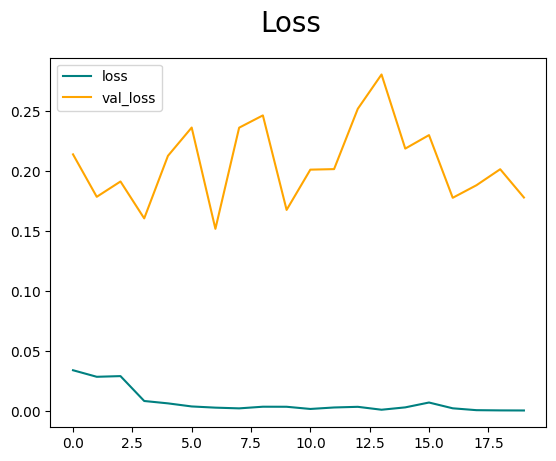

In [77]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

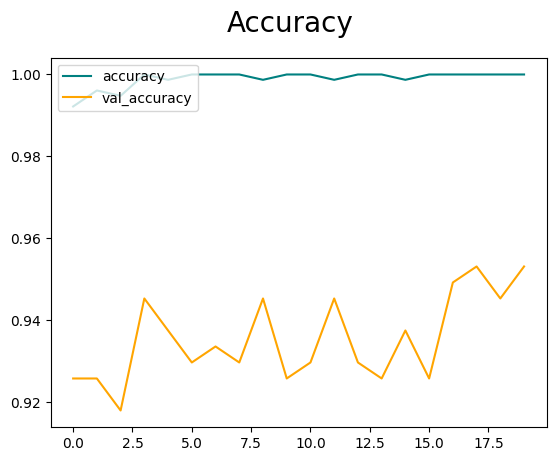

In [78]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [79]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model2.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 912ms/step


In [80]:
print(f'Precision:{pre.result().numpy()},\n Recall:{re.result().numpy()},\n Accuracy:{acc.result().numpy()}')

Precision:0.9056603908538818,
 Recall:0.52173912525177,
 Accuracy:0.8205128312110901


In [117]:
# Scale the image and predict class
yhat2 = model2.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


In [118]:
yhat2

array([[0.89976925]], dtype=float32)

In [119]:
if yhat2 < 0.5:
    print('It is a happy Image')
else:
    print('It is a sad Image')

It is a sad Image


### 6.0 Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Save mode
model.save(os.path.join('models','happysadmodel.h5'))

c:\Users\bradd\Documents\DATA SCIENCE\PROJECTS\DeepLearning_ImageClassifier\deeplearningimageclassifier\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Loading the model
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [ ]:
# Predicting 
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 311ms/step
